<a href="https://colab.research.google.com/github/JaviPalop/ProyectoIII/blob/main/AndiTimeSeries_pruebaModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install andi-datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
import andi_datasets
from andi_datasets.datasets_challenge import challenge_phenom_dataset, _get_dic_andi2, _defaults_andi2
from andi_datasets.datasets_phenom import datasets_phenom
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Conv1D, Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling1D, MaxPooling2D

from keras.constraints import Constraint, unit_norm
import tensorflow as tf

from keras.preprocessing import sequence as seqq
from keras.layers import Input

from keras.models import Model
from keras.models import load_model

from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


/usr/local/lib/python3.10/dist-packages/andi_datasets/utils_videos.py:22: UserWarning: From your imports it seems that you will need Deeptrack. Install if needed using pip install deeptrack.
  warnings.warn('From your imports it seems that you will need Deeptrack. Install if needed using pip install deeptrack.')


In [ ]:
def moving_average(list, window_size):
    return [sum(list[i:i+window_size])/window_size for i in range(len(list)-window_size+1)]

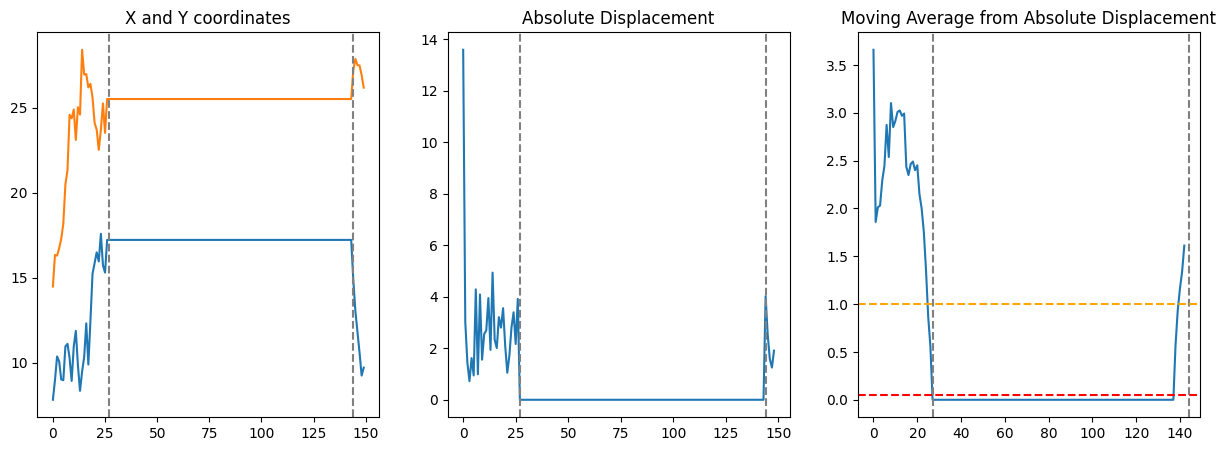

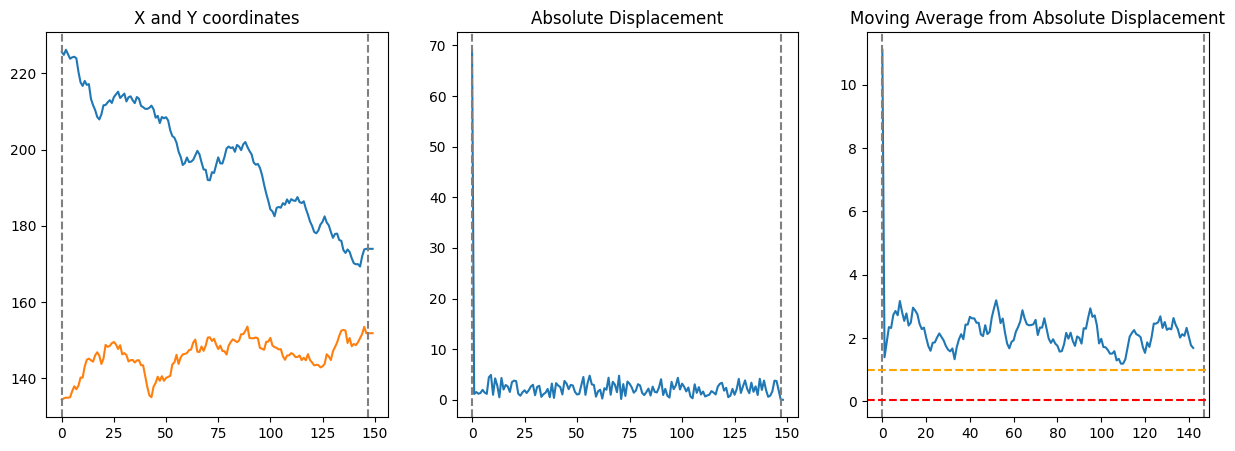

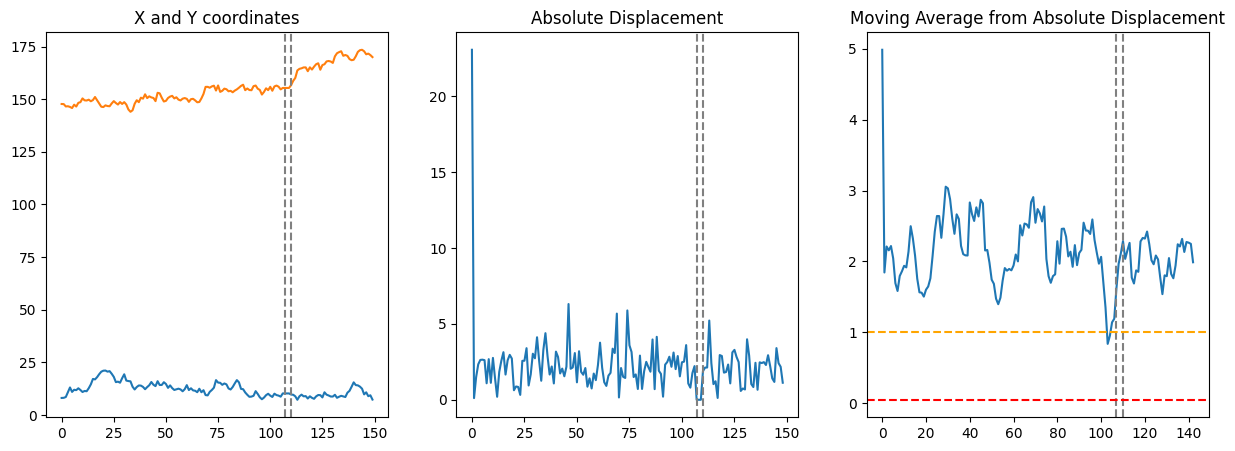

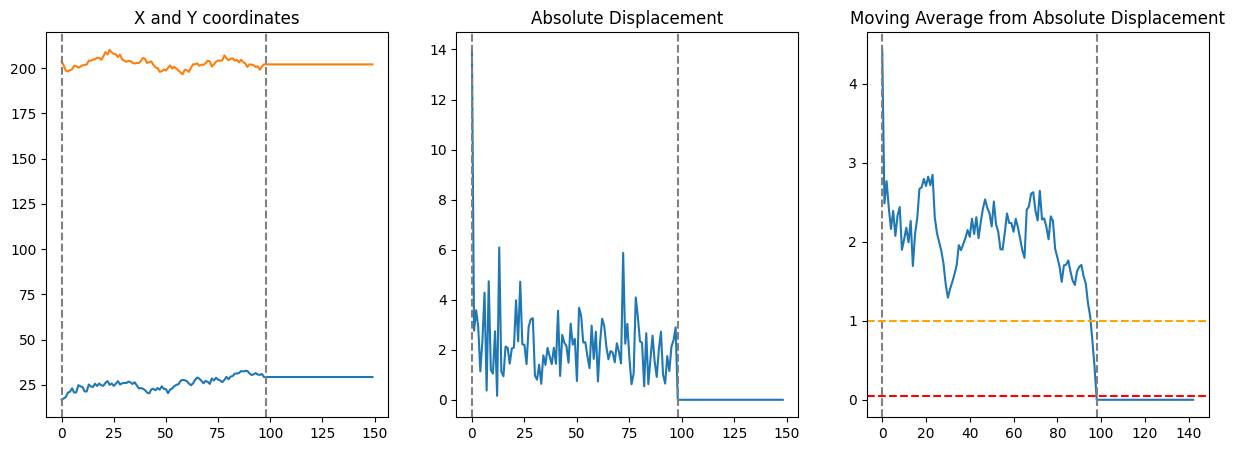

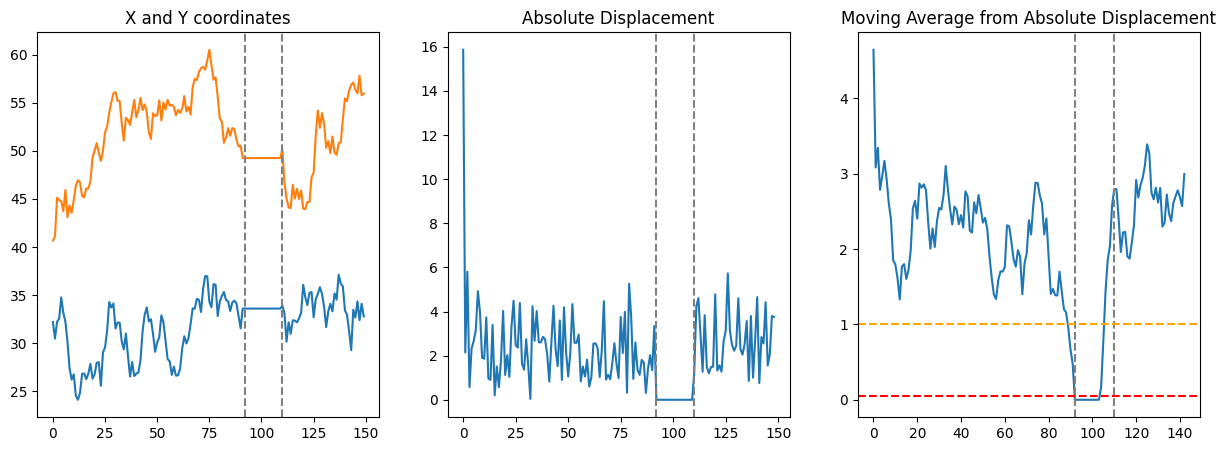

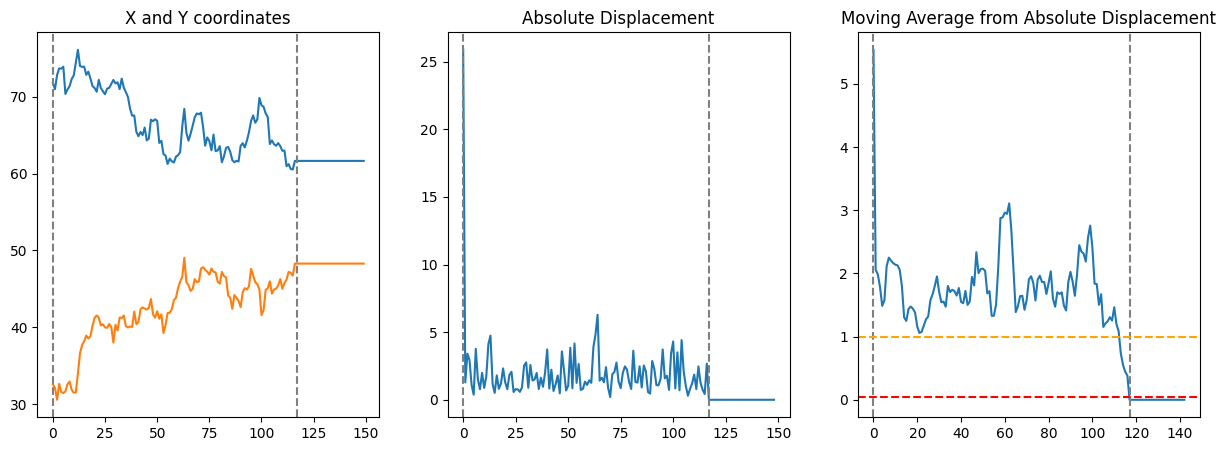

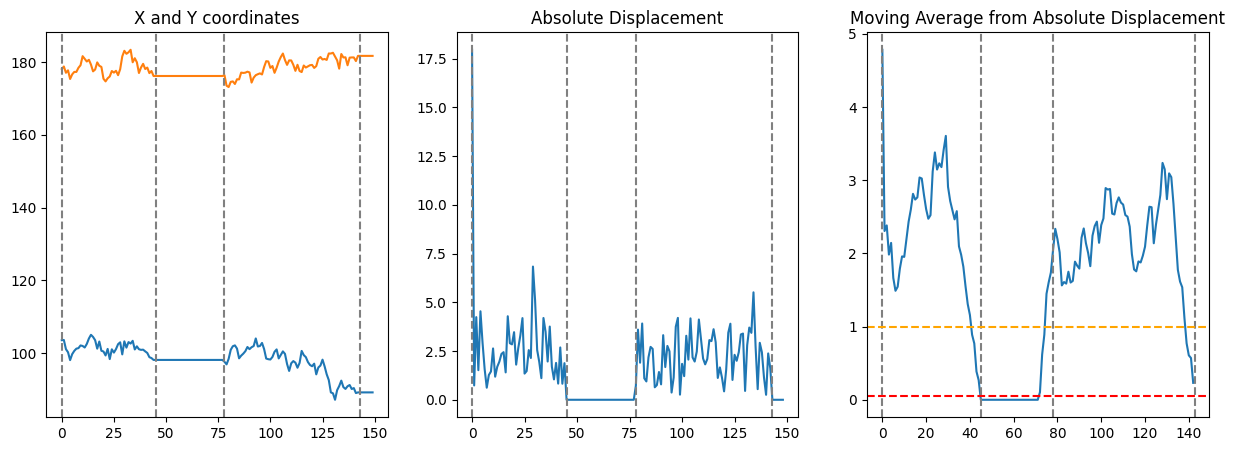

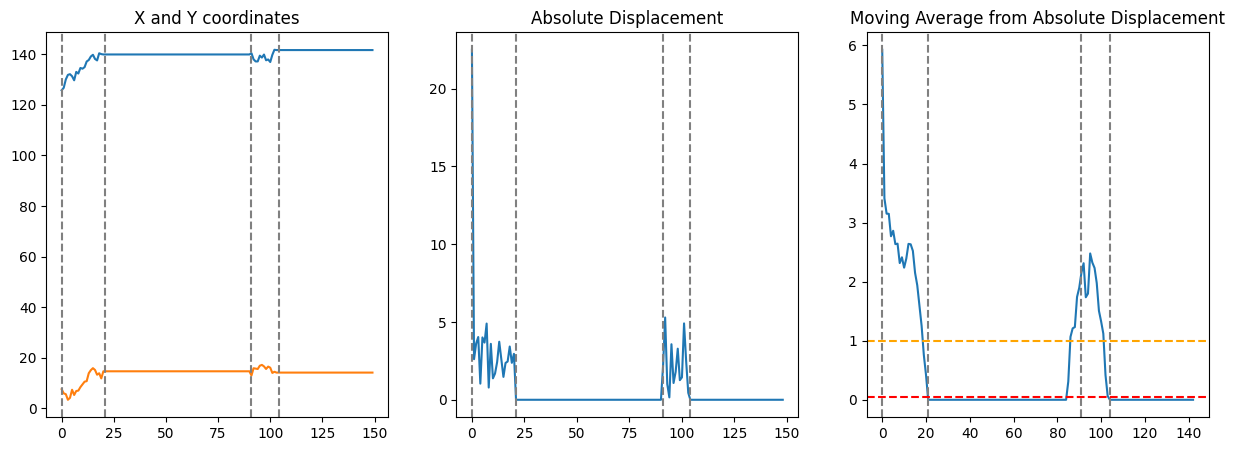

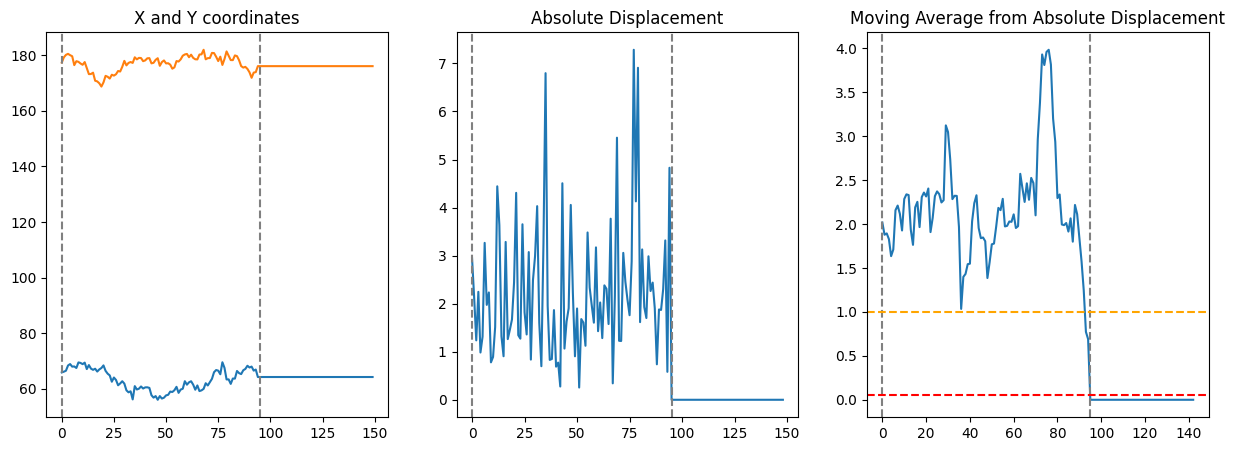

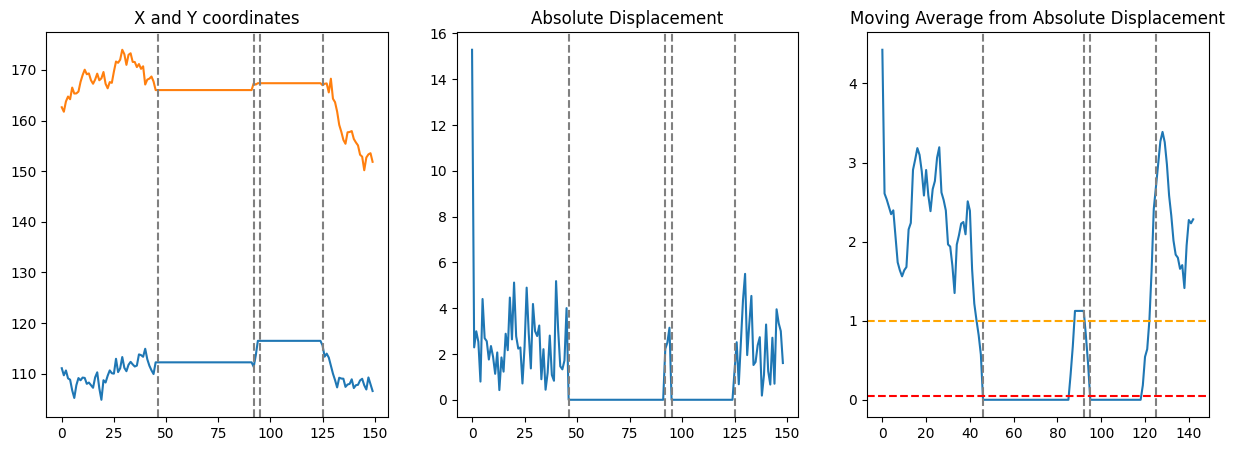

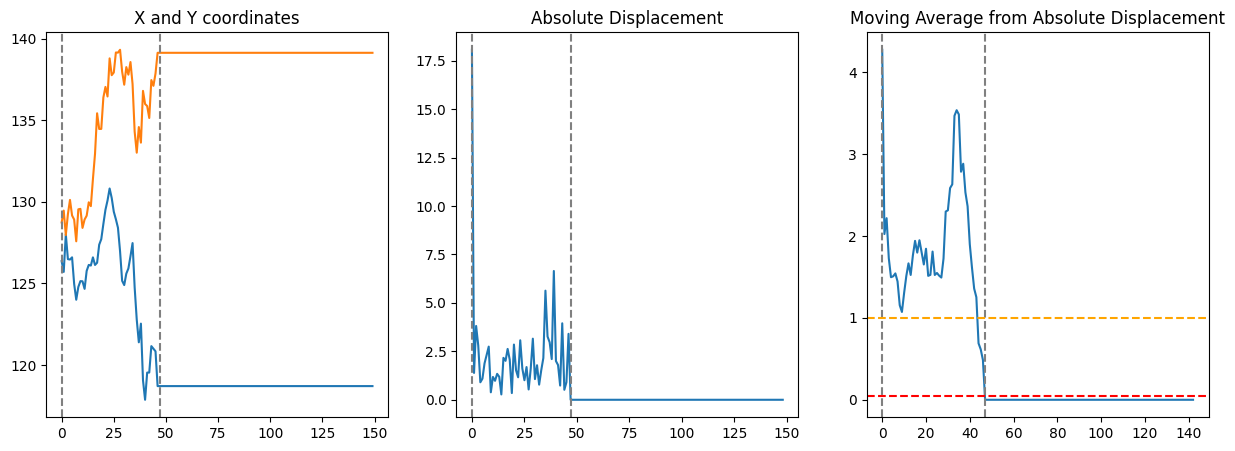

In [ ]:
dic = _get_dic_andi2(3)
dic['T'] = 150
dic['N'] = 30
trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
trajs_x = [[] for _ in range(len(trajs_p[0]))]
trajs_y = [[] for _ in range(len(trajs_p[0]))]
labels = [[] for _ in range(len(trajs_p[0]))]

for i, instant in enumerate(trajs_p):
  for particle, position in enumerate(instant):
    trajs_x[particle].append(position[0])
    trajs_y[particle].append(position[1])
    labels[particle].append(labels_p[i][particle][2])

indexes = []
for i, l in enumerate(labels):
  if 0 in l:
    indexes.append(i)

ad = [[] for _ in range(len(trajs_p[0]))]

for i, instant in enumerate(trajs_p[1:]):
  for particle, position in enumerate(instant):
    ad[particle].append(abs(trajs_x[particle][i] - trajs_x[particle][i-1]) + abs(trajs_y[particle][i] - trajs_y[particle][i-1]))

for ind in indexes:
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.plot(trajs_x[ind])
  plt.plot(trajs_y[ind])
  cps = [i for i, l in enumerate(labels[ind][1:]) if labels[ind][i] - labels[ind][i-1] != 0]
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.title('X and Y coordinates')
  plt.subplot(1, 3, 2)
  plt.plot(ad[ind])
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.title('Absolute Displacement')
  plt.subplot(1, 3, 3)
  plt.plot(moving_average(ad[ind], 7))
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.axhline(y = 1, color = 'orange', linestyle = '--')
  plt.axhline(y = 0.05, color = 'red', linestyle = '--')
  plt.title('Moving Average from Absolute Displacement')
  plt.show()

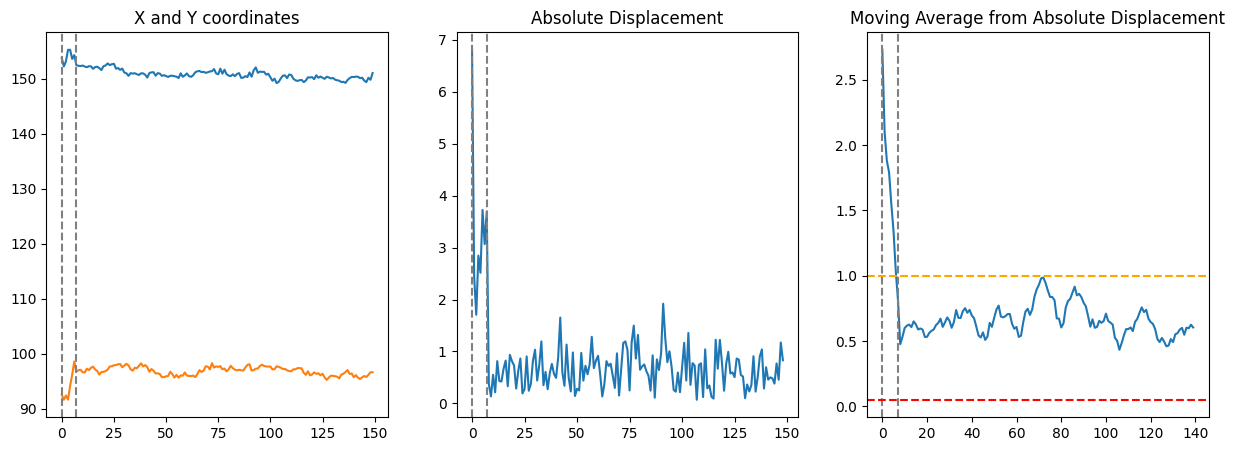

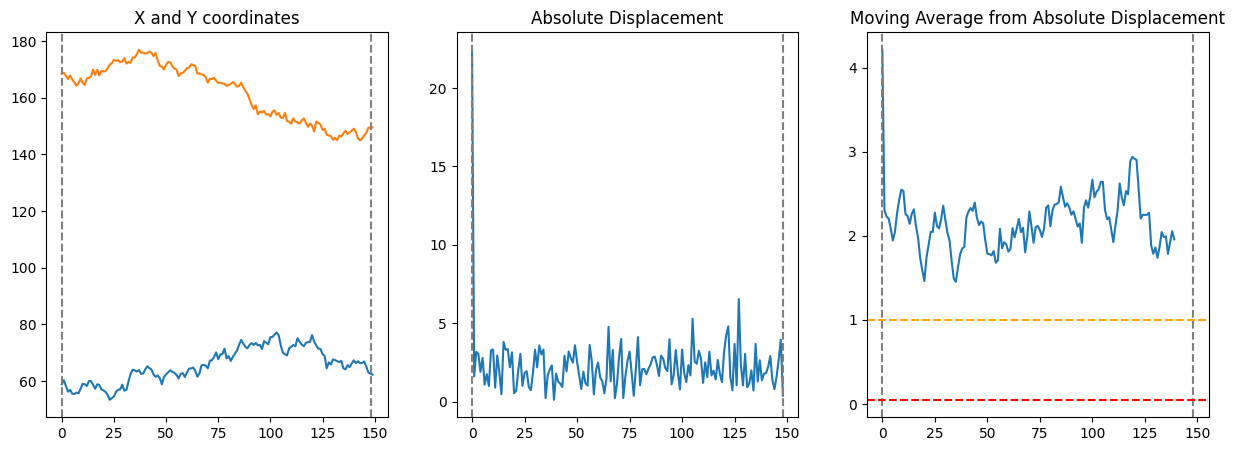

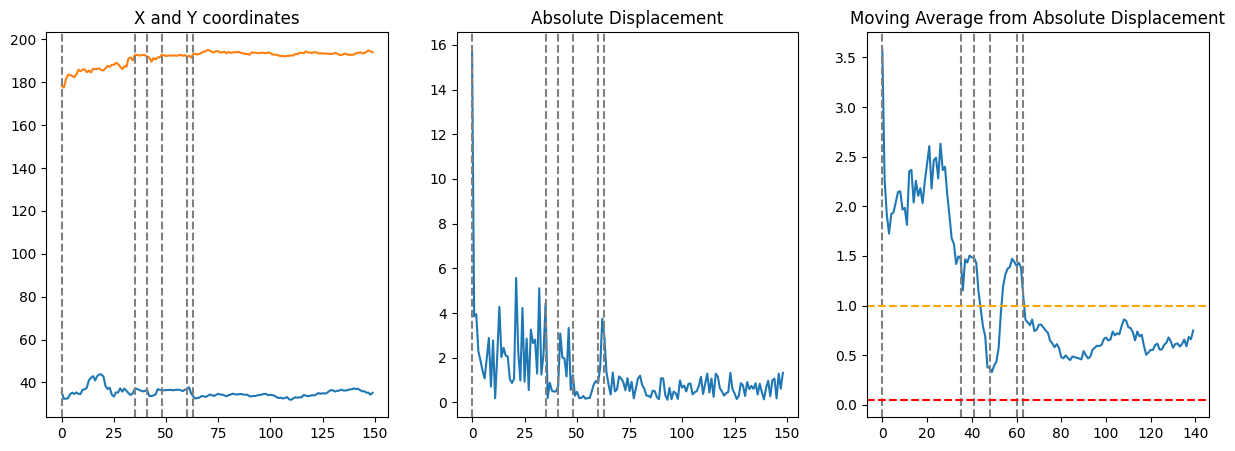

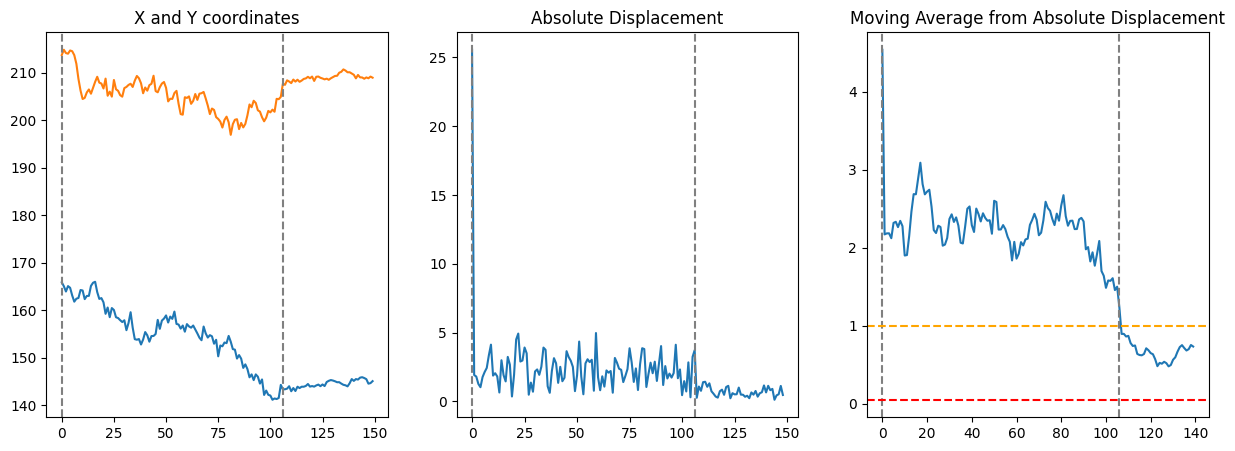

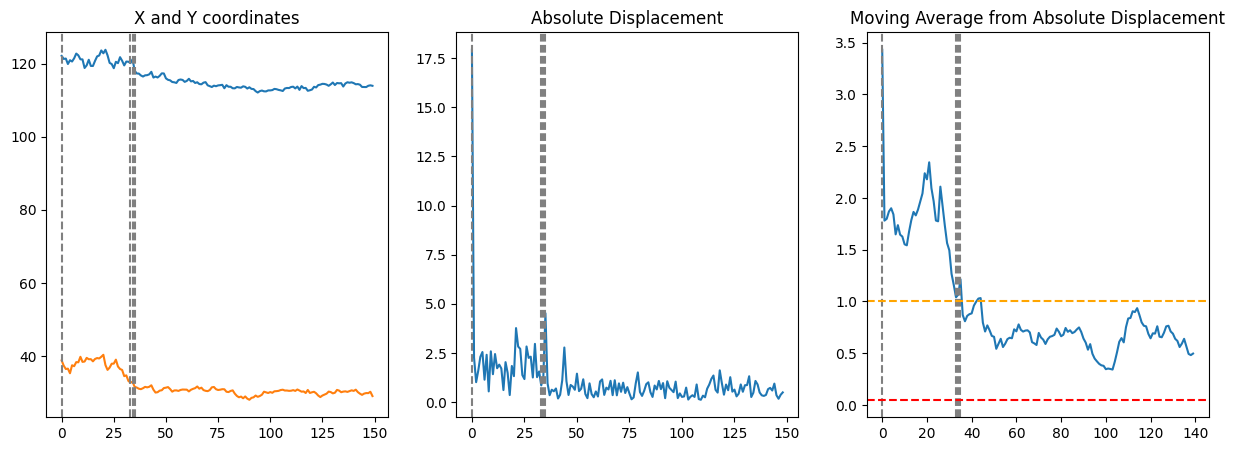

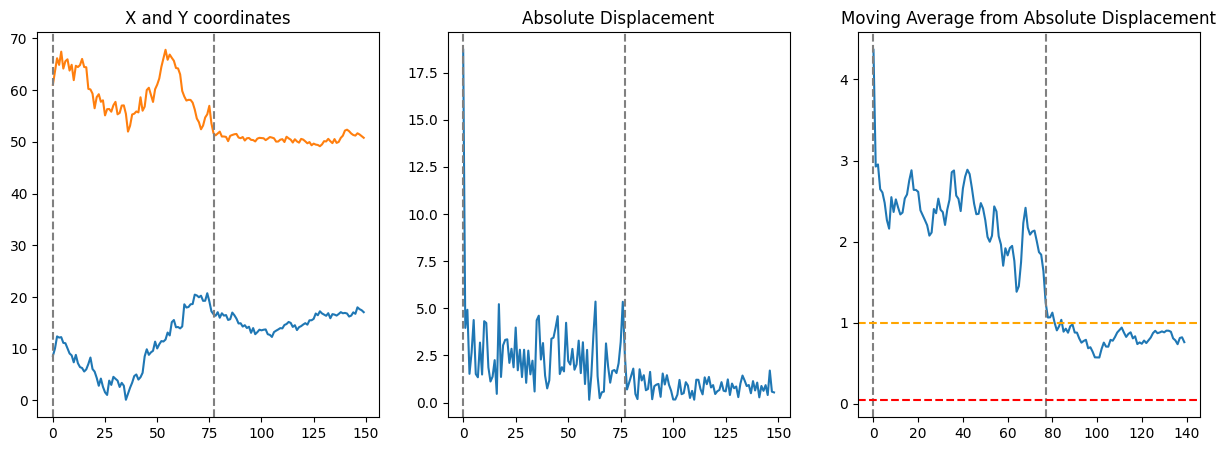

In [ ]:
dic = _get_dic_andi2(5)
dic['T'] = 150
dic['N'] = 30
trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
trajs_x = [[] for _ in range(len(trajs_p[0]))]
trajs_y = [[] for _ in range(len(trajs_p[0]))]
labels = [[] for _ in range(len(trajs_p[0]))]

for i, instant in enumerate(trajs_p):
  for particle, position in enumerate(instant):
    trajs_x[particle].append(position[0])
    trajs_y[particle].append(position[1])
    labels[particle].append(labels_p[i][particle][2])

indexes = []
for i, l in enumerate(labels):
  if 1 in l:
    indexes.append(i)

ad = [[] for _ in range(len(trajs_p[0]))]

for i, instant in enumerate(trajs_p[1:]):
  for particle, position in enumerate(instant):
    ad[particle].append(abs(trajs_x[particle][i] - trajs_x[particle][i-1]) + abs(trajs_y[particle][i] - trajs_y[particle][i-1]))

for ind in indexes:
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.plot(trajs_x[ind])
  plt.plot(trajs_y[ind])
  cps = [i for i, l in enumerate(labels[ind][1:]) if labels[ind][i] - labels[ind][i-1] != 0]
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.title('X and Y coordinates')
  plt.subplot(1, 3, 2)
  plt.plot(ad[ind])
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.title('Absolute Displacement')
  plt.subplot(1, 3, 3)
  plt.plot(moving_average(ad[ind], 10))
  for cp in cps:
    plt.axvline(x = cp, color = 'grey', linestyle = '--')
  plt.axhline(y = 1, color = 'orange', linestyle = '--')
  plt.axhline(y = 0.05, color = 'red', linestyle = '--')
  plt.title('Moving Average from Absolute Displacement')
  plt.show()


In [ ]:
dic = _get_dic_andi2(1)
dic['T'] = 150
dic['N'] = 30
trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
trajs_x = [[] for _ in range(len(trajs_p[0]))]
trajs_y = [[] for _ in range(len(trajs_p[0]))]
labels_alpha = [0 for _ in range(len(trajs_p[0]))]
labels_K = [0 for _ in range(len(trajs_p[0]))]

for i, instant in enumerate(trajs_p):
  for particle, position in enumerate(instant):
    trajs_x[particle].append(position[0])
    trajs_y[particle].append(position[1])
    labels_alpha[particle] = labels_p[i][particle][0]
    labels_K[particle] = labels_p[i][particle][1]

for particle, evolution in enumerate(trajs_x):
  trajs_x[particle] += trajs_y[particle]

X = trajs_x
Y_alpha = labels_alpha
Y_K = labels_K

trainX_alpha, testX_alpha, trainY_alpha, testY_alpha = train_test_split(X, Y_alpha, test_size=0.2, random_state=123)
trainX_K, testX_K, trainY_K, testY_K = train_test_split(X, Y_K, test_size=0.2, random_state=123)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
1/1 [==============================] - 14s 14s/step - loss: 1.5012 - mae: 1.5012 - val_loss: 1.4391 - val_mae: 1.4391


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/200
1/1 [==============================] - 6s 6s/step - loss: 1.4775 - mae: 1.4775 - val_loss: 1.1980 - val_mae: 1.1980
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 1.2548 - mae: 1.2548 - val_loss: 0.9634 - val_mae: 0.9634
Epoch 4/200
1/1 [==============================] - 4s 4s/step - loss: 1.0072 - mae: 1.0072 - val_loss: 0.8598 - val_mae: 0.8598
Epoch 5/200
1/1 [==============================] - 5s 5s/step - loss: 0.9185 - mae: 0.9185 - val_loss: 0.6982 - val_mae: 0.6982
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 0.7525 - mae: 0.7525 - val_loss: 0.5016 - val_mae: 0.5016
Epoch 7/200
1/1 [==============================] - 5s 5s/step - loss: 0.5554 - mae: 0.5554 - val_loss: 0.3179 - val_mae: 0.3179
Epoch 8/200
1/1 [==============================] - 4s 4s/step - loss: 0.3721 - mae: 0.3721 - val_loss: 0.1515 - val_mae: 0.1515
Epoch 9/200
1/1 [==============================] - 4s 4s/step - loss: 0.2303 - mae: 0.2303 - val_loss: 0

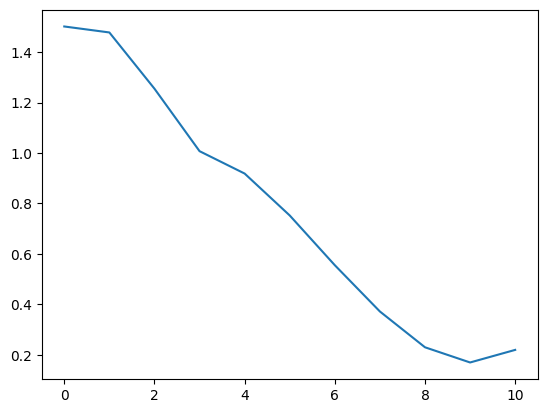

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(lr=0.001, decay=1e-6, clipnorm=1.0)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=8, activation='relu', input_shape=(300,1)))
model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))
model.compile(loss="mae", optimizer=optimizer, metrics=["mae"], run_eagerly=True)
es = EarlyStopping(monitor='mae', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('model-{epoch:03d}-{mae:.4f}.h5', monitor='mae', mode='min', verbose=0, save_best_only=True)

history = model.fit(trainX_alpha, trainY_alpha, validation_data=(testX_alpha, testY_alpha), epochs=200, verbose=1, callbacks=[es, mc])
plt.plot(history.history['loss'])
plt.show()

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.6970 - mae: 0.6970 - val_loss: 0.7269 - val_mae: 0.7269
Epoch 2/200
1/1 [==============================] - 5s 5s/step - loss: 0.7128 - mae: 0.7128 - val_loss: 0.7080 - val_mae: 0.7080
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 0.6992 - mae: 0.6992 - val_loss: 0.6622 - val_mae: 0.6622
Epoch 4/200
1/1 [==============================] - 4s 4s/step - loss: 0.6571 - mae: 0.6571 - val_loss: 0.5955 - val_mae: 0.5955
Epoch 5/200
1/1 [==============================] - 5s 5s/step - loss: 0.5902 - mae: 0.5902 - val_loss: 0.5102 - val_mae: 0.5102
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 0.5090 - mae: 0.5090 - val_loss: 0.4077 - val_mae: 0.4077
Epoch 7/200
1/1 [==============================] - 4s 4s/step - loss: 0.4094 - mae: 0.4094 - val_loss: 0.3003 - val_mae: 0.3003
Epoch 8/200
1/1 [==============================] - 6s 6s/step - loss: 0.3102 - mae: 0.3102 - val_loss: 0

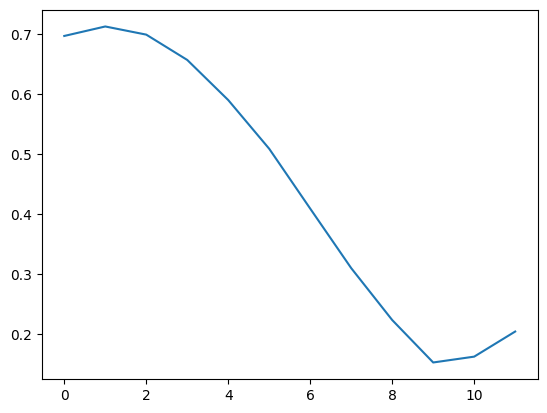

In [ ]:
model_K = model
history_K = model.fit(trainX_K, trainY_K, validation_data=(testX_K, testY_K), epochs=200, verbose=1, callbacks=[es, mc])
plt.plot(history_K.history['loss'])
plt.show()

In [ ]:
# Work in progress
def preprocess_for_training(trajs, labels):
  ad = [[] for _ in range(len(trajs[0]))]
  smoothed_ad = []
  labels_alpha = [0 for _ in range(len(trajs[0]))]
  labels_K = [0 for _ in range(len(trajs[0]))]
  new_trajs = []
  new_labels_alpha = []
  new_labels_K = []

  for i, instant in enumerate(trajs):
    for particle, position in enumerate(instant):
      trajs_x[particle].append(position[0])
      trajs_y[particle].append(position[1])

  for i, instant in enumerate(trajs_p[1:]):
    for particle, position in enumerate(instant):
      ad[particle].append(abs(trajs_x[particle][i] - trajs_x[particle][i-1]) + abs(trajs_y[particle][i] - trajs_y[particle][i-1]))

  for ad_traj in ad:
    smoothed_ad.append(moving_average(ad_traj, 10))

  for ind, traj in enumerate(trajs_x):
    new_trajs = []
    cps = [0] + [i for i, l in enumerate(labels[ind][1:]) if labels[ind][i] - labels[ind][i-1] != 0]
    for i, cp in enumerate(cps[1:]):
      aux_x = traj[cps[i]:cps[i+1]]
      aux_x.reverse()
      aux_x = traj[cps[i]:cps[i+1]] + aux_x
      aux_y = trajs_y[ind][cps[i]:cps[i+1]]
      new_traj_x = []
      new_traj_y = []
      for j in range(int(150/len(aux_x)) + 1):
        new_traj_x += traj[cps[i]:cps[i+1]] + aux_x

In [ ]:
def generate_training_data(N, L):

  # GENERAR DE ESTADO 0 Y 1
  for gen_model, state in ((4, 0), (5, 1)):
    dic = _get_dic_andi2(gen_model)
    dic['T'] = L * 3
    dic['N'] = N
    trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
    trajs_x = [[] for _ in range(len(trajs_p[0]))]
    trajs_y = [[] for _ in range(len(trajs_p[0]))]
    labels = [[] for _ in range(len(trajs_p[0]))]

    for i, instant in enumerate(trajs_p):
      for particle, position in enumerate(instant):
        trajs_x[particle].append(position[0])
        trajs_y[particle].append(position[1])
        labels[particle].append(labels_p[i][particle])

    indexes = []
    for i, l in enumerate(labels):
      if state in l[2]:
        indexes.append(i)

    ad = [[] for _ in range(len(indexes))]

    for i, instant in enumerate(trajs_p[1:]):
      for particle, position in enumerate(instant):
        if particle in indexes:
          ad[particle].append(abs(trajs_x[particle][i] - trajs_x[particle][i-1]) + abs(trajs_y[particle][i] - trajs_y[particle][i-1]))



  for ind in indexes:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(trajs_x[ind])
    plt.plot(trajs_y[ind])
    cps = [i for i, l in enumerate(labels[ind][1:]) if labels[ind][i] - labels[ind][i-1] != 0]
    for cp in cps:
      plt.axvline(x = cp, color = 'grey', linestyle = '--')
    plt.title('X and Y coordinates')
    plt.subplot(1, 3, 2)
    plt.plot(ad[ind])
    for cp in cps:
      plt.axvline(x = cp, color = 'grey', linestyle = '--')
    plt.title('Absolute Displacement')
    plt.subplot(1, 3, 3)
    plt.plot(moving_average(ad[ind], 10))
    for cp in cps:
      plt.axvline(x = cp, color = 'grey', linestyle = '--')
    plt.axhline(y = 1, color = 'orange', linestyle = '--')
    plt.axhline(y = 0.05, color = 'red', linestyle = '--')
    plt.title('Moving Average from Absolute Displacement')
    plt.show()

In [ ]:
def get_sequential_subset(lst, state_value, seq_length=3):
    # Initialize an empty list to store the indices of elements with the same z value
    indices = [i for i, item in enumerate(lst) if item[2] == state_value]

    # Check for sequential indices
    for i in range(len(lst) - seq_length + 1):
      if all([lst[i + j][2] == state_value for j in range(seq_length)]):
        return i
        '''
        if indices[i:i+seq_length] == list(range(indices[i], indices[i] + seq_length)):
            return i'''
            #return lst[indices[i]:indices[i] + seq_length]

    # If no sequential subset is found, return an empty list
    return

# Test the function
lst = [[1, 2, 3], [4, 5, 2], [6, 7, 2], [28, 29, 3], [30, 31, 3], [30, 31, 3], [30, 31, 3]]
z_value = 3
print(get_sequential_subset(lst, z_value))


3


In [ ]:
def generate_balanced_training_dataset(N, L):
  X = []
  Y = []
  for gen_model, state in ((3, 0), (5, 1)):
    X_sub = []
    Y_sub = []
    while len(X_sub) < N//3:
      dic = _get_dic_andi2(gen_model)
      dic['T'] = L * 3
      dic['N'] = N
      trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
      trajs_x = [[] for _ in range(len(trajs_p[0]))]
      trajs_y = [[] for _ in range(len(trajs_p[0]))]
      labels = [[] for _ in range(len(trajs_p[0]))]
      for i, instant in enumerate(trajs_p):
        for particle, position in enumerate(instant):
          trajs_x[particle].append(position[0])
          trajs_y[particle].append(position[1])
          labels[particle].append(labels_p[i][particle][:3])
      indexes = []
      for i, l in enumerate(labels):
        for j in l:
          if state == j[2]:
            indexes.append(i)
            break

      for index in indexes:
        start = get_sequential_subset(labels[index], state, seq_length=L)
        if start is not None:
          X_sub.append(trajs_x[index][start:start+L] + trajs_y[index][start:start+L])
          Y_sub.append(labels[index][start])
    X += X_sub
    Y += Y_sub

  for gen_model in (1, 2, 4):
    dic = _get_dic_andi2(gen_model)
    dic['T'] = L
    dic['N'] = (N // 3) // 3
    trajs_p, labels_p = datasets_phenom().create_dataset(dics = dic)
    trajs_x = [[] for _ in range(len(trajs_p[0]))]
    trajs_y = [[] for _ in range(len(trajs_p[0]))]
    labels = [[] for _ in range(len(trajs_p[0]))]
    for i, instant in enumerate(trajs_p):
      for particle, position in enumerate(instant):
        trajs_x[particle].append(position[0])
        trajs_y[particle].append(position[1])
        labels[particle].append(labels_p[i][particle][:3])
    for i, pos in enumerate(trajs_x):
      X.append(trajs_x[i] + trajs_y[i])
      Y.append(labels[i][0])
  return X, Y

In [ ]:
X,Y = generate_balanced_training_dataset(10000, 30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train_paired_sinval = [
    [[sublist[i], sublist[i + 30]] for i in range(30)] for sublist in x_train]
X_test_paired = [
    [[sublist[i], sublist[i + 30]] for i in range(30)] for sublist in x_test]

In [ ]:
y_train ## [k, alpha, state]
y_train_k = [y_train[a][0] for a in range(len(y_train))]
y_test_k = [y_test[a][0] for a in range(len(y_test))]
y_train_alpha_sinval = [y_train[a][1] for a in range(len(y_train))] # 1571 alphas
y_test_alpha = [y_test[a][1] for a in range(len(y_test))] # 175 alphas

X_train_paired, X_val_stacking, y_train_base_k, y_val_stacking_k, y_train_alpha, y_val_stacking_alpha = train_test_split(
    X_train_paired_sinval, y_train_k, y_train_alpha_sinval, test_size=0.4, random_state=42)


In [ ]:
import math

def calculate_displacement(trajectories):
    # This function assumes that each element in trajectories is a list of [x, y] pairs
    displacement_results = []

    # Iterate over each trajectory
    for trajectory in trajectories:
        # List to store the displacements for the current trajectory
        trajectory_displacements = []

        # Calculate displacement between consecutive points
        for i in range(1, len(trajectory)):
            x1, y1 = trajectory[i-1]
            x2, y2 = trajectory[i]
            displacement = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            trajectory_displacements.append(displacement)

        # Append the list of displacements for this trajectory to the results list
        displacement_results.append(trajectory_displacements)

    return displacement_results


In [ ]:
X_train_ad2 = calculate_displacement(X_train_paired)
X_test_ad2 = calculate_displacement(X_test_paired)
X_val_ad2 = calculate_displacement(X_val_stacking)

## MODEL ALPHA

In [ ]:
# Predicting alpha
# 1.d) Absolute displacement
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Initialize the Random Forest Regressor
rf_model_ad2 = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model on the training data
rf_model_ad2.fit(X_train_ad2, y_train_alpha)

# Predict on the test data
y_pred_rf_a = rf_model_ad2.predict(X_test_ad2)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_alpha, y_pred_rf_a)
r2 = r2_score(y_test_alpha, y_pred_rf_a)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 0.04429189428527263
R² Score: 0.9323520318256351


In [ ]:
from sklearn.svm import SVR
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Definir el modelo
svr = SVR()

# Definir los parámetros para la búsqueda
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5],
              'gamma': [1e1, 1e0, 1e-1, 1e-2]}

# Realizar la búsqueda de parámetros con HalvingGridSearchCV
search = HalvingGridSearchCV(svr, param_grid, cv = 5, scoring='neg_mean_absolute_error')
search.fit(X_train_ad2, y_train_alpha)

best_params = search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrena un modelo SVR con los mejores hiperparámetros encontrados
best_svr = SVR(**best_params)
best_svr.fit(X_train_ad2, y_train_alpha)
y_pred_svm_a = best_svr.predict(X_test_ad2)

mae = mean_absolute_error(y_test_alpha, y_pred_svm_a)
r2 = r2_score(y_test_alpha, y_pred_svm_a)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mejores hiperparámetros: {'C': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Absolute Error: 0.04860457707731295
R² Score: 0.9027998445222161


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

# Predicting alpha
# 1.d) Absolute displacement


# alpha:
param_grid_alpha = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}
grid_search_alpha = GridSearchCV(MLPRegressor(random_state=42), param_grid_alpha, cv=5)
grid_search_alpha.fit(X_train_ad2, y_train_alpha)
best_params_alpha = grid_search_alpha.best_params_
print("Best Hyperparameters:", best_params_alpha)

best_model_alpha = grid_search_alpha.best_estimator_
y_pred_mlp_a = best_model_alpha.predict(X_test_ad2)
mae_alpha = mean_absolute_error(y_test_alpha, y_pred_mlp_a)
print("MAE for alpha:", mae_alpha)

r2 = r2_score(y_test_alpha, y_pred_mlp_a)
print("R² Score:", r2)

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (200,), 'solver': 'adam'}
MAE for alpha: 0.08029231331186097
R² Score: 0.8727382446975214


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # Needed to enable HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
hgb_regressor = HistGradientBoostingRegressor(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [31, 41, 51],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [20, 30, 40]
}

# Realizar la búsqueda de parámetros con HalvingGridSearchCV
search = HalvingGridSearchCV(hgb_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(X_train_ad2, y_train_alpha)

best_params = search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar un modelo HistGradientBoostingRegressor con los mejores hiperparámetros encontrados
best_hgb = HistGradientBoostingRegressor(**best_params, random_state=42)
best_hgb.fit(X_train_ad2, y_train_alpha)
y_pred_hgb_a = best_hgb.predict(X_test_ad2)

mae = mean_absolute_error(y_test_alpha, y_pred_hgb_a)
r2 = r2_score(y_test_alpha, y_pred_hgb_a)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 100, 'max_leaf_nodes': 41, 'min_samples_leaf': 20}
Mean Absolute Error: 0.04767636435590303
R² Score: 0.9241597131359212


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Definir el modelo
gbr_regressor = GradientBoostingRegressor(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de parámetros con HalvingGridSearchCV
search = HalvingGridSearchCV(gbr_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(X_train_ad2, y_train_alpha)

best_params = search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar un modelo GradientBoostingRegressor con los mejores hiperparámetros encontrados
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train_ad2, y_train_alpha)
y_pred_gbr_a = best_gbr.predict(X_test_ad2)

mae = mean_absolute_error(y_test_alpha, y_pred_gbr_a)
r2 = r2_score(y_test_alpha, y_pred_gbr_a)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.04885619716520025
R² Score: 0.921586432239037


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
estimators = [
    ('svr', svr),
    ('rf', rf_model_ad2),
    ('mlp', best_model_alpha),
    ('hgb', best_hgb)
]
stacking_model = StackingRegressor(estimators=estimators)



In [ ]:
stacking_model.fit(X_val_ad2, y_val_stacking_alpha)
# Realizar predicciones en el conjunto de prueba

stacking_pred_a = stacking_model.predict(X_test_ad2)

# Calcular el MAE para cada modelo

stacking_mae = mean_absolute_error(y_test_alpha, stacking_pred_a)

# Calcular los errores de predicción para cada modelo

stacking_errors = np.abs(y_test_alpha - stacking_pred_a)
r2 = r2_score(y_test_alpha, stacking_pred_a)


# Imprimir los resultados
print("MAE para Stacking:", stacking_mae)
print("R² Score:", r2)


MAE para Stacking: 0.048457394143058476
R² Score: 0.9248672214177723


## MODELO K

In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score


In [ ]:
# Initialize the Random Forest Regressor
rf_model_ad2_k = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model on the training data
rf_model_ad2_k.fit(X_train_ad2, y_train_base_k)

# Predict on the test data
y_pred_rf_k = rf_model_ad2_k.predict(X_test_ad2)

# Calculate the performance metrics
msle=mean_squared_log_error(y_test_k, y_pred_rf_k)
r2 = r2_score(y_test_k, y_pred_rf_k)

print("MSLE:", msle)
print("R² Score:", r2)

MSLE: 0.005831069371627863
R² Score: 0.9136878266973659


In [ ]:
from sklearn.svm import SVR
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Definir el modelo
svr = SVR()

# Definir los parámetros para la búsqueda
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5],
              'gamma': [1e1, 1e0, 1e-1, 1e-2]}

# Realizar la búsqueda de parámetros con HalvingGridSearchCV
search = HalvingGridSearchCV(svr, param_grid, cv = 5, scoring='neg_mean_absolute_error')
search.fit(X_train_ad2, y_train_base_k)

best_params = search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrena un modelo SVR con los mejores hiperparámetros encontrados
best_svr = SVR(**best_params)
best_svr.fit(X_train_ad2, y_train_base_k)
y_pred_svm_k = best_svr.predict(X_test_ad2)

msle=mean_squared_log_error(y_test_k, y_pred_svm_k)
r2 = r2_score(y_test_k, y_pred_svm_k)

print("MSLE:", msle)
print("R² Score:", r2)

Mejores hiperparámetros: {'C': 0.1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
MSLE: 0.007644045008289002
R² Score: 0.8904941800403995


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

# Predicting alpha
# 1.d) Absolute displacement


# alpha:
param_grid_k = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}
grid_search_k = GridSearchCV(MLPRegressor(random_state=42), param_grid_k, cv=5)
grid_search_k.fit(X_train_ad2, y_train_base_k)
best_params_k = grid_search_k.best_params_
print("Best Hyperparameters:", best_params_k)

best_model_k = grid_search_k.best_estimator_
y_pred_mlp_k = best_model_k.predict(X_test_ad2)
msle=mean_squared_log_error(y_test_k, y_pred_mlp_k)
print("MSLE:", msle)

r2 = r2_score(y_test_k, y_pred_mlp_k)
print("R² Score:", r2)

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (200,), 'solver': 'adam'}
MSLE: 0.007236657304021458
R² Score: 0.8916307579207656


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Definir el modelo
gbr_regressor = GradientBoostingRegressor(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de parámetros con HalvingGridSearchCV
search = HalvingGridSearchCV(gbr_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(X_train_ad2, y_train_base_k)

best_params = search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar un modelo GradientBoostingRegressor con los mejores hiperparámetros encontrados
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train_ad2, y_train_base_k)
y_pred_gbr_k = best_gbr.predict(X_test_ad2)

msle=mean_squared_log_error(y_test_k, y_pred_gbr_k)
r2 = r2_score(y_test_k, y_pred_gbr_k)

print("MSLE:", msle)
print("R² Score:", r2)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MSLE: 0.006129886487349915
R² Score: 0.9088158530060644


In [ ]:
estimators = [
    ('svr', svr),
    ('rf', rf_model_ad2),
    ('mlp', best_model_k),
    ('hgb', best_hgb)
]
stacking_model = StackingRegressor(estimators=estimators)

In [ ]:
stacking_model.fit(X_val_ad2, y_val_stacking_k)
# Realizar predicciones en el conjunto de prueba

stacking_pred_k = stacking_model.predict(X_test_ad2)

# Calcular el MAE para cada modelo

stacking_msle=mean_squared_log_error(y_test_k, stacking_pred_k)

# Calcular los errores de predicción para cada modelo

stacking_errors = np.abs(y_test_k - stacking_pred_k)
r2 = r2_score(y_test_k, stacking_pred_k)

# Imprimir los resultados
print("MSLE:", stacking_msle)
print("R² Score:", r2)


MSLE: 0.00612037397157207
R² Score: 0.9090505526440943


In [ ]:
# Create the hexbin plot
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_k, stacking_pred_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 400)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# Traj. = {len(y_test_k)} MAE = {np.mean(np.abs(y_test_k - stacking_pred_k)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

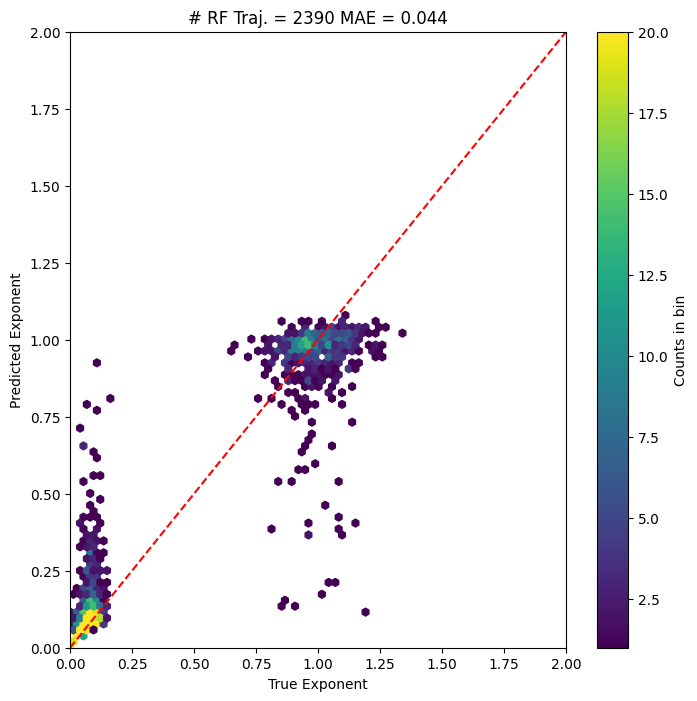

In [ ]:
# Create the hexbin plot rf alphas y_test_alpha, y_pred_rf_a
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, y_pred_rf_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# RF Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - y_pred_rf_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

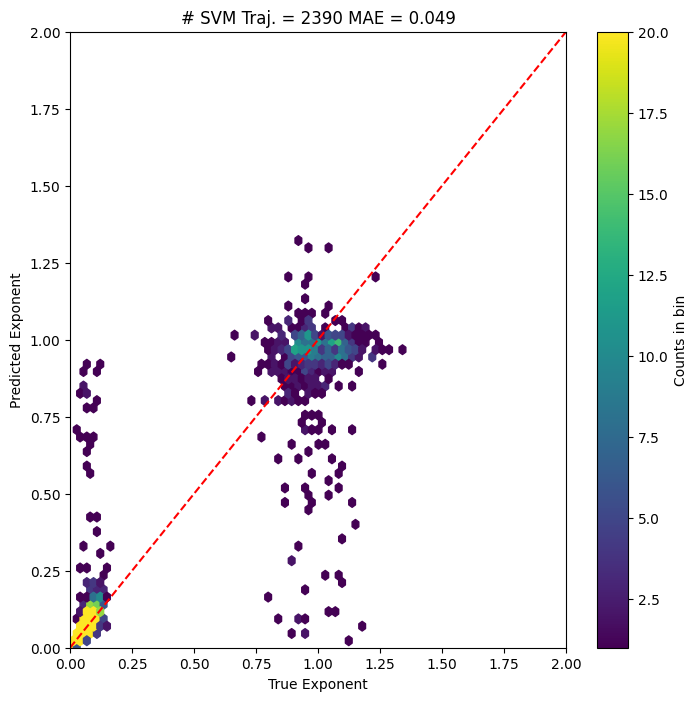

In [ ]:
# Create the hexbin plot svm
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, y_pred_svm_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# SVM Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - y_pred_svm_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

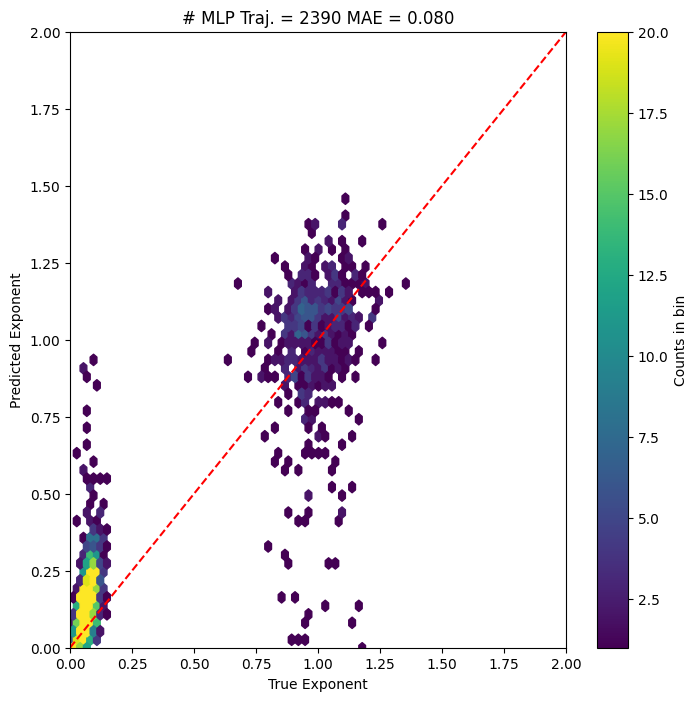

In [ ]:
# Create the hexbin plot mlp
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, y_pred_mlp_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# MLP Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - y_pred_mlp_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

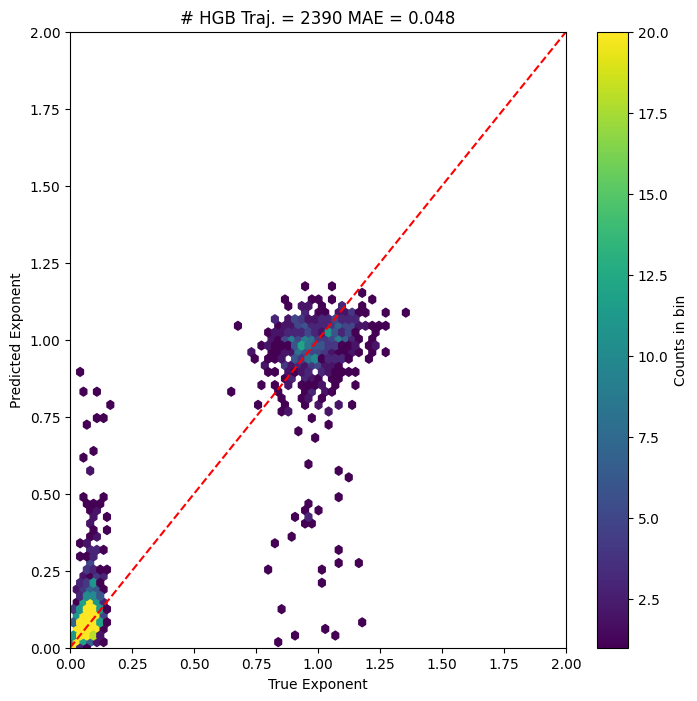

In [ ]:
# Create the hexbin plot hgb
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, y_pred_hgb_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# HGB Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - y_pred_hgb_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

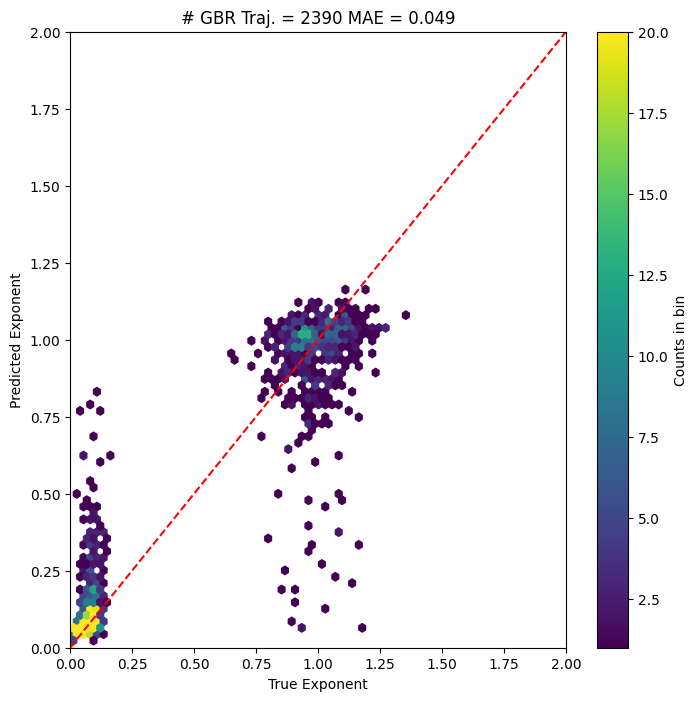

In [ ]:
# Create the hexbin plot gbr
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, y_pred_gbr_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# GBR Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - y_pred_gbr_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

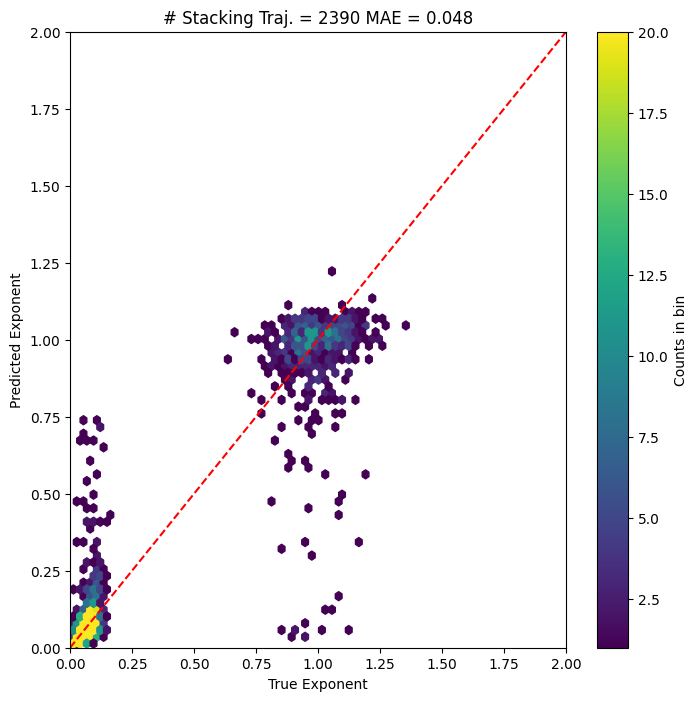

In [ ]:
# Create the hexbin plot stacking
plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_alpha, stacking_pred_a, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# Stacking Traj. = {len(y_test_alpha)} MAE = {np.mean(np.abs(y_test_alpha - stacking_pred_a)):.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

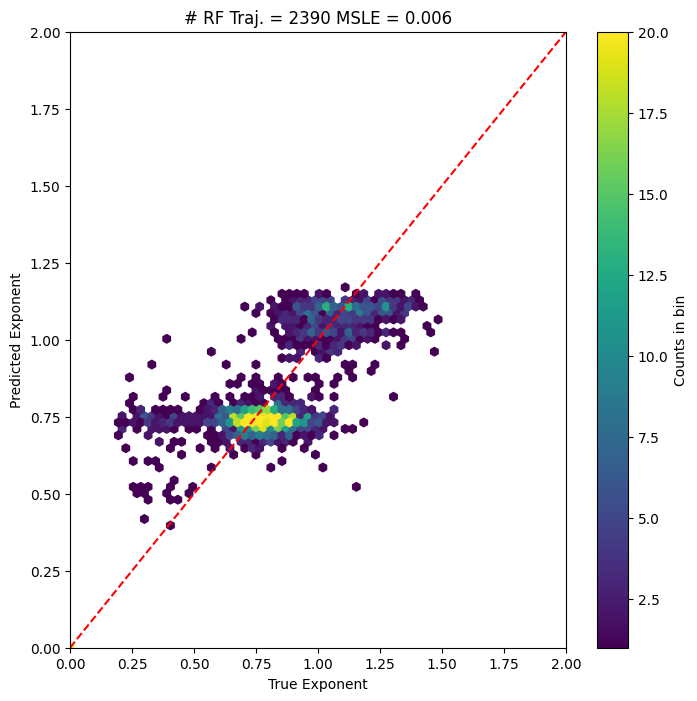

In [ ]:
# Create the hexbin plot rf k (y_test_k, y_pred_rf_k
msle=mean_squared_log_error(y_test_k, y_pred_rf_k)

plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_k, y_pred_rf_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# RF Traj. = {len(y_test_k)} MSLE = {msle:.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

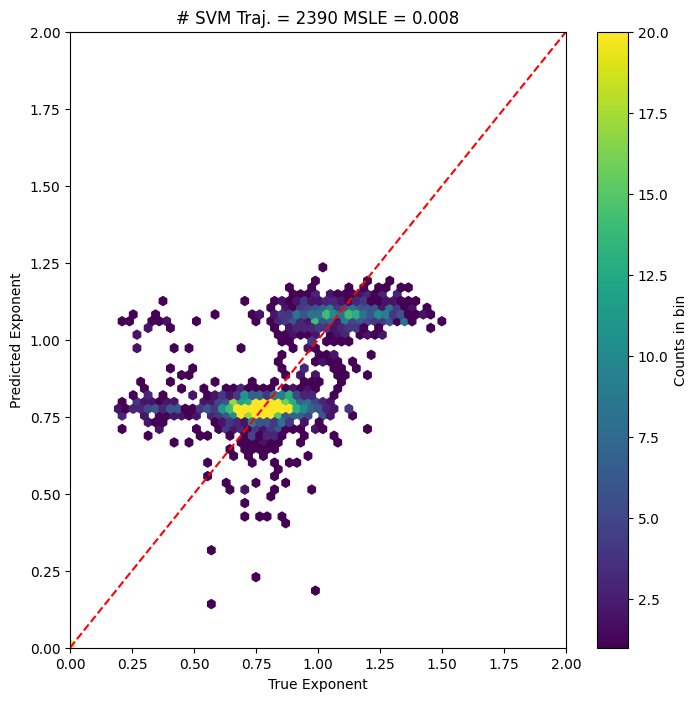

In [ ]:
# Create the hexbin plot svm y_pred_svm_k
plt.figure(figsize=(8, 8))
msle=mean_squared_log_error(y_test_k, y_pred_svm_k)

hb = plt.hexbin(y_test_k, y_pred_svm_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# SVM Traj. = {len(y_test_k)} MSLE = {msle:.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

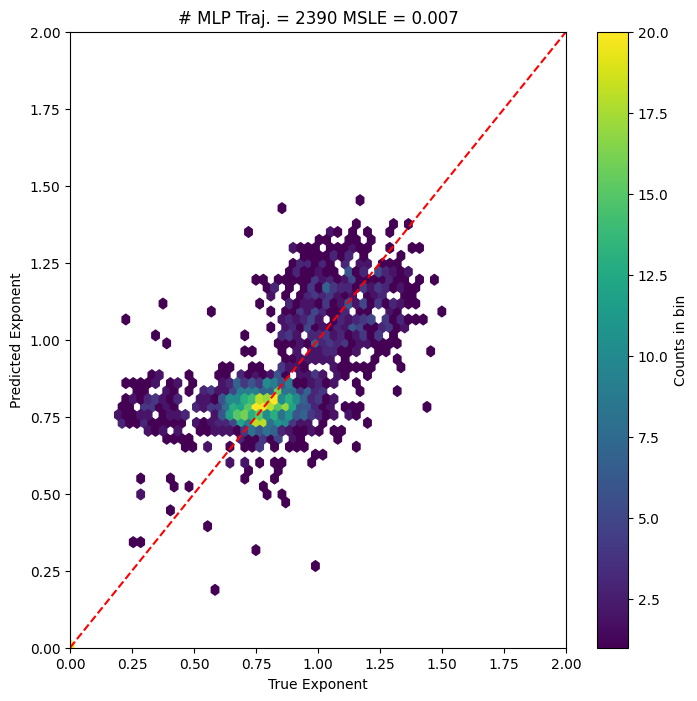

In [ ]:
# Create the hexbin plot mlp
msle=mean_squared_log_error(y_test_k, y_pred_mlp_k)

plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_k, y_pred_mlp_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# MLP Traj. = {len(y_test_k)} MSLE = {msle:.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

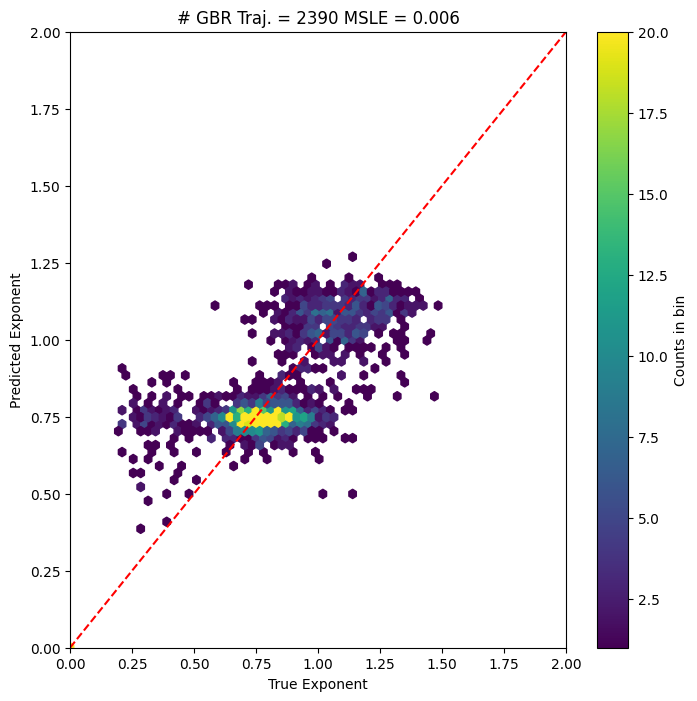

In [ ]:
# Create the hexbin plot gbr
plt.figure(figsize=(8, 8))
msle=mean_squared_log_error(y_test_k, y_pred_gbr_k)

hb = plt.hexbin(y_test_k, y_pred_gbr_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# GBR Traj. = {len(y_test_k)} MSLE = {msle:.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()

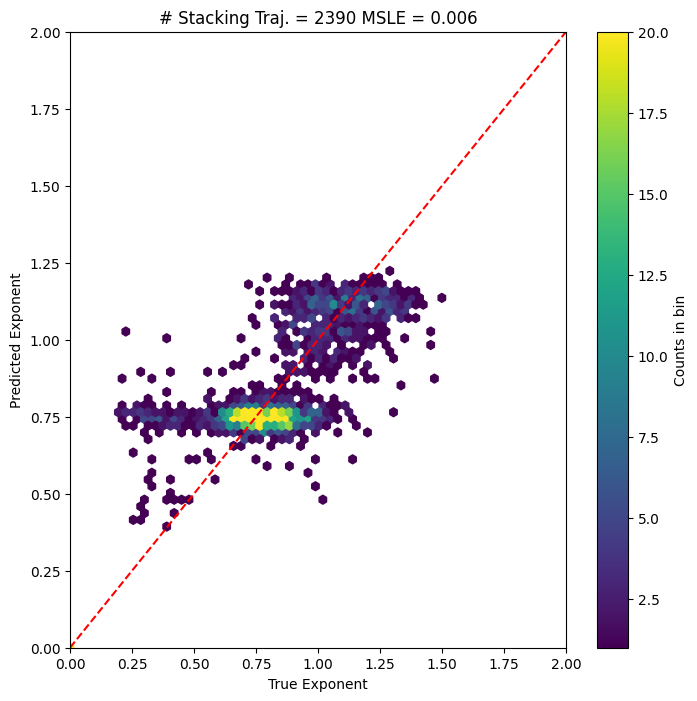

In [ ]:
# Create the hexbin plot stacking
msle=mean_squared_log_error(y_test_k, stacking_pred_k)

plt.figure(figsize=(8, 8))
hb = plt.hexbin(y_test_k, stacking_pred_k, gridsize=50, cmap='viridis', mincnt=1, vmax= 20)
plt.colorbar(hb, label='Counts in bin')
plt.xlabel('True Exponent')
plt.ylabel('Predicted Exponent')
plt.title(f'# Stacking Traj. = {len(y_test_k)} MSLE = {msle:.3f}')

# Enhance the diagonal visibility (x=y line to show perfect prediction line)
plt.xlim(0, 2)  # Setting x-axis limits
plt.ylim(0, 2)  # Setting y-axis limits
plt.plot([0, 2], [0, 2], 'r--')  # Diagonal line

plt.show()